# Project: Wrangle and Analyse Data

In [2]:
#Installing Packages
import pandas as pd
import numpy as np
import tweepy
import json
import requests

## Gathering

In [3]:
#Downloading Twitter Archive
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
#Retrieving Image Predictions
url= "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open ("image-predictions.tsv", mode = "wb") as file:
    file.write(response.content)

In [5]:
image_pred = pd.read_csv("image-predictions.tsv", sep = "\t")
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [6]:
#Json Tweet File
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True)

In [144]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)


2356

In [145]:
from timeit import default_timer as timer

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293: 838083903487373313
Success


Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808

Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
1062: 741303864243200000
Success
10

Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
1311: 707038192327901184
Success
13

Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
1560: 688547210804498433
Success
15

Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
18

Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
20

Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
23

In [146]:
tweets_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        
tweet_file.close()

In [147]:
# Create tweet_info DataFrame
tweet_info = pd.DataFrame()

In [148]:
tweet_info['id'] = list(map(lambda tweet: tweet['id'], tweets_data))
tweet_info['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweets_data))
tweet_info['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweets_data))

In [149]:
tweet_info.head()

,id,retweet_count,favorite_count
0,892420643555336193,7486,35455
1,892177421306343426,5557,30693
2,891815181378084864,3680,23085
3,891689557279858688,7664,38739
4,891327558926688256,8266,37018


## Assessing Data
### Twitter Archive Data

First of all, I will have a look at the twitter archive data to see any quality or tidiness issues.

In [150]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [151]:
twitter_archive.shape

(2356, 17)

The twitter archive dataframe as 2356 entries and 17 columns.

In [152]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

From the above, I have noticed the following issues:
* in_reply_to_status_id, in_reply_to_user_id have 78 replies. (quality)
* retweeted_status_id, retweeted_status_user_id and retweeted_status_timetstamp all have 181 retweets. (quality)
* There are 2297 entries with expanded urls (images) meaning that there are 59 entries with missing data. (quality)
* timestamp column is not in datatime (quality)
* there are four columns associated with age (doggo, floofer, pupper and puppo). (tidiness)
* in_reply_to_status_id, in_reply_to_user_id not needed for original tweets. (tidiness once quality issue fixed)
* retweeted_status_id, retweeted_status_user_id and retweeted_status_timetstamp not needed for original tweets. (tidiness once quality issue fixed)


In [153]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [154]:
twitter_archive['rating_numerator'].max()

1776

In [155]:
twitter_archive['rating_denominator'].max()

170

Most of the statistics in the above are slightly redundant (i.e. we don't need the statistics for tweet_id as this column relates to a unique id number). However, if we look at the rating columns, we can see that both have a min value of 0 and some quite extreme maximum values. We know that the dogs are given a score out of 10, but based on the information provided in the Project Motivation and [here](https://knowyourmeme.com/memes/theyre-good-dogs-brent), it's not unusual that the numerator can be bigger than the denominator (although 1776 might be an extreme).

In [156]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

Majority of ratings have a denominator of 10, there is only 23 entries where this isn't the case. Having a look at the numerators when denominators are 10.

In [157]:
archive_denom_ten=twitter_archive[twitter_archive.rating_denominator==10]
archive_denom_ten.rating_numerator.value_counts().sort_index(ascending=False)

1776      1
666       1
420       2
182       1
75        2
27        1
26        1
17        1
15        2
14       54
13      351
12      558
11      463
10      461
9       156
8       102
7        54
6        32
5        37
4        15
3        19
2         9
1         8
0         2
Name: rating_numerator, dtype: int64

In [158]:
len(archive_denom_ten[archive_denom_ten.rating_numerator>14])

12

There are 12 cases where the numerator is greater than 14. If you look at the spread of numerators, you can see that the number of cases significantly reduces for numerators greater than 14. These cases will be dropped.

In [159]:
archive_denom_ten[archive_denom_ten.rating_numerator==0][['text','rating_numerator','rating_denominator']]

,text,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plag...,0,10
1016,"PUPDATE: can't see any. Even if I could, I cou...",0,10


These two cases when the numerator is 0 look fine.

In [160]:
twitter_archive.duplicated().sum()

0

There are no duplicates in the data.

Let's have a look at the names of Dog's:

In [161]:
twitter_archive.name.value_counts().head(50)

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Penny        10
Lola         10
Tucker       10
Winston       9
Bo            9
the           8
Sadie         8
Daisy         7
Toby          7
Bailey        7
Buddy         7
an            7
Scout         6
Jax           6
Dave          6
Koda          6
Bella         6
Rusty         6
Jack          6
Leo           6
Oscar         6
Stanley       6
Milo          6
Sammy         5
Oakley        5
Alfie         5
very          5
George        5
Bentley       5
Phil          5
Louis         5
Larry         5
Sunny         5
Finn          5
Chester       5
Gus           5
Sampson       4
Reginald      4
Beau          4
Carl          4
Archie        4
Jerry         4
Maddie        4
Hank          4
Name: name, dtype: int64

Within the above, all names are capitalised and are some cases with regular words.

In [162]:
non_cap = twitter_archive.name.str.contains('^[a-z]', regex = True)
twitter_archive[non_cap].name.value_counts().sort_index()

a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old              1
one              4
quite            4
space            1
such             1
the              8
this             1
unacceptable     1
very             5
Name: name, dtype: int64

In [163]:
twitter_archive.expanded_urls.isna().sum()

59

There are 59 cases where the tweet does not include expanded URLs. Would be interesting to see if any were replies or retweets.

In [164]:
(twitter_archive.expanded_urls.isna() & (twitter_archive.in_reply_to_status_id.notnull() | twitter_archive.retweeted_status_id.notnull())).sum()

56

56 out of 59 cases with missing URLs are in fact retweets or replies. 

In [165]:
#looking at sources
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

There are 4 types of sources:
* Twitter for iPhone
* Vine
* Twitter Web
* TweetDeck

This means that we can categorise based on these and not include the whole string.

In [166]:
# Dog Categories
# There are 4 columns which categorises the Dog into: Doggo, Puppo, Pupper and Floofer

twitter_archive.doggo.value_counts()


None     2259
doggo      97
Name: doggo, dtype: int64

In [167]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [168]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [169]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

### Predictions Data

In [170]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Compared to our twitter archive data, the predictions data has 281 less entries. This will be considered missing data.

In [171]:
image_pred.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


We can see that p1_dog, p2_dog, p3_dog are all boolean and entries are either true or false - shows True when prediction is right. Are there cases where no dogs are predicted?

In [172]:
len(image_pred[(image_pred.p1_dog==False)&(image_pred.p2_dog==False)&(image_pred.p3_dog==False)])

324

There are 324 instances where no dogs are predicted across all three predictions.

### JSON Tweet File

In [173]:
tweet_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2331 non-null   int64
 1   retweet_count   2331 non-null   int64
 2   favorite_count  2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [174]:
tweet_info.describe()

,id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2633.299442,7407.293007
std,6.823170e+16,4453.651638,11506.173484
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,534.500000,1286.000000
50%,7.182469e+17,1230.000000,3217.000000
75%,7.986692e+17,3056.000000,9065.500000
max,8.924206e+17,75660.000000,152801.000000


### Summary of Assessment

#### Quality
##### Twitter Archive
1. Retweets aren't original tweets
2. Replies aren't original tweets
3. `timestamp` incorrect data type
4. 4 key sources with `source` column - can be simplified
5. Invalid entries within `name`
6. `rating_denominator` not equal to 10
7. `rating_numerator` greater than 14
8. 59 tweets with missing `expanded_urls`, where 56 of these are retweets or replies.

##### Image Predictions
9. There are only 2075 image predictions, which is 281 entries less than Twitter Archive. These will be considered missing data.

###### JSON Tweet File
10. There are 25 less entries than Twitter Archive. 

#### Tidiness
##### Twitter Archive
1. As only interested in original tweets, following retweet columns are not needed:
    * `retweeted_status_id`
    * `retweeted_status_user_id`
    * `retweeted_status_timestamp`
2. Similarly, reply tweets are not original tweets. The folllowing aren't needed:
    * `in_reply_to_status_id` 
    * `in_reply_to_user_id`
3. As all entries need denominator of 10, this column is no longer needed.
4. 4 columns associated with Dog stages (`doggo`, `floofer`, `pupper`, `puppo`) which do not conform with rules of tidy data as these can be represented in one column.

##### JSON Tweet File
5. Should be merged with `twitter_archives`

##### Image Predictions
6. Should be merged with `twitter_archives`

## Cleaning    

In [192]:
# Creating Copies of each DataFrame
archive_clean = twitter_archive.copy()
predictions_clean = image_pred.copy()
json_clean = tweet_info.copy()

### Quality #1

##### Define
   Remove all entries with non values in `retweeted_status_id`, `retweeted_status_user_id` and  `retweeted_status_timestamp` as theres aren't original tweets.
   
##### Code

In [193]:
archive_clean = archive_clean[archive_clean.retweeted_status_id.isna()]

##### Test

In [194]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### Quality #2

##### Define
   Remove all entries with non-null values in `in_reply_to_status_id` and `in_reply_to_user_id` as these aren't original tweets.
   
##### Code

In [195]:
archive_clean = archive_clean[archive_clean.in_reply_to_user_id.isna()]

##### Test

In [196]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Quality #3

##### Define
   Change `timestamp` to datetime from object.
   
##### Code

In [197]:
archive_clean['timestamp'] = pd.to_datetime(archive_clean.timestamp)

##### Test

In [198]:
archive_clean.timestamp.dtype

datetime64[ns, UTC]

### Quality #4

##### Define
Replace `source` entries with simplified source information by extracting string between html code.

##### Code

In [199]:
archive_clean['source'] = archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

##### Test

In [200]:
archive_clean.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

### Quality #5

##### Define
Replace all entries with regular words in `name` with null values.

##### Code

In [201]:
reg_words = []
for row in archive_clean['name']:
    if row[0].islower() and row not in reg_words :
        reg_words.append(row)
print(reg_words)


['such', 'a', 'quite', 'not', 'one', 'incredibly', 'very', 'my', 'his', 'an', 'actually', 'just', 'getting', 'mad', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [202]:
#replacing regular words with null value
archive_clean['name'].replace(reg_words, 
                        np.nan,
                       inplace = True)
#replacing None with null value
archive_clean['name'].replace('None', 
                        np.nan,
                       inplace = True)

##### Test

In [203]:
archive_clean[archive_clean.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [204]:
archive_clean[archive_clean.name.isin(reg_words)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


[Used following stackoverflow to help with above.](https://stackoverflow.com/questions/12096252/use-a-list-of-values-to-select-rows-from-a-pandas-dataframe)

### Quality #6

##### Define
Remove all entries where `rating_denominator` does not equal 10.

##### Code

In [205]:
archive_clean=archive_clean[archive_clean.rating_denominator ==10]

##### Test

In [206]:
archive_clean.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

### Quality #7

##### Define
Remove all entries where `rating_numerator` is greater than 14.

##### Code

In [207]:
archive_clean=archive_clean[archive_clean.rating_numerator <15]

##### Test

In [208]:
archive_clean.rating_numerator.value_counts()

12    486
10    436
11    413
13    287
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

### Quality #8

##### Define
Remove tweets with missing data in `expanded_urls`

##### Code

In [209]:
archive_clean = archive_clean[archive_clean.expanded_urls.notnull()]

##### Test

In [210]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2072 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2072 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2072 non-null   datetime64[ns, UTC]
 4   source                      2072 non-null   object             
 5   text                        2072 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2072 non-null   object             
 10  rating_numerator            2072 non-null   int64           

### Tidiness #1

##### Define
Remove columns `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp`.

##### Code

In [211]:
archive_clean = archive_clean.drop(['retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'], axis = 1)

##### Test

In [213]:
archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Tidiness #2

##### Define
Remove columns `in_reply_to_status_id` and `in_reply_to_user_id`.

##### Code

In [214]:
archive_clean = archive_clean.drop(['in_reply_to_status_id',
                                    'in_reply_to_user_id'], axis = 1)

##### Test

In [215]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

### Tidiness #3

##### Define
Remove `rating_denominator` as all entries have values of 10.

##### Code

In [216]:
archive_clean = archive_clean.drop('rating_denominator', axis = 1)

##### Test

In [217]:
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Tidiness #4

##### Define
Melt `doggo`, `floofer`, `pupper` and `puppo` into one `dog_stage` column

##### Code

In [218]:
archive_clean.doggo.value_counts()

None     1989
doggo      83
Name: doggo, dtype: int64

In [219]:
archive_clean.floofer.value_counts()

None       2062
floofer      10
Name: floofer, dtype: int64

In [220]:
archive_clean.pupper.value_counts()

None      1844
pupper     228
Name: pupper, dtype: int64

In [221]:
archive_clean.puppo.value_counts()

None     2048
puppo      24
Name: puppo, dtype: int64

In [222]:
archive_clean['dog_stage'] = archive_clean[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

In [223]:
archive_clean.dog_stage = archive_clean.dog_stage.astype('category')

In [225]:
archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

##### Test

In [226]:
#confirming doggo, floofer, pupper and puppo have been dropped
archive_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'name', 'dog_stage'],
      dtype='object')

In [228]:
#confirming values within dog_stage
archive_clean.dog_stage.value_counts()

None       1738
pupper      228
doggo        72
puppo        24
floofer      10
Name: dog_stage, dtype: int64

### Tidiness #5

##### Define
Merge `predictions_clean` and `json_clean` with `archive_clean` to form one DataFrame and drop any missing entries.

##### Code

In [229]:
df = pd.merge(archive_clean, predictions_clean,on='tweet_id', how='inner')

In [231]:
df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [232]:
json_clean.head()

,id,retweet_count,favorite_count
0,892420643555336193,7486,35455
1,892177421306343426,5557,30693
2,891815181378084864,3680,23085
3,891689557279858688,7664,38739
4,891327558926688256,8266,37018


In [234]:
json_clean.rename(columns={'id':'tweet_id'},inplace=True)
json_clean.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7486,35455
1,892177421306343426,5557,30693
2,891815181378084864,3680,23085
3,891689557279858688,7664,38739
4,891327558926688256,8266,37018


In [235]:
df = pd.merge(df, json_clean,on='tweet_id', how='inner')

##### Test

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1942 entries, 0 to 1941
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1942 non-null   int64              
 1   timestamp         1942 non-null   datetime64[ns, UTC]
 2   source            1942 non-null   object             
 3   text              1942 non-null   object             
 4   expanded_urls     1942 non-null   object             
 5   rating_numerator  1942 non-null   int64              
 6   name              1336 non-null   object             
 7   dog_stage         1942 non-null   category           
 8   jpg_url           1942 non-null   object             
 9   img_num           1942 non-null   int64              
 10  p1                1942 non-null   object             
 11  p1_conf           1942 non-null   float64            
 12  p1_dog            1942 non-null   bool               
 13  p2 

## Store Data

In [238]:
df.to_csv('twitter_archive_master.csv', index = False)

In [239]:

ls *.csv

twitter-archive-enhanced.csv  twitter_archive_master.csv


## Analysis

In [243]:
#create a copy of dataframe for analysis
df_dogs=df.copy()

In [244]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1942 entries, 0 to 1941
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1942 non-null   int64              
 1   timestamp         1942 non-null   datetime64[ns, UTC]
 2   source            1942 non-null   object             
 3   text              1942 non-null   object             
 4   expanded_urls     1942 non-null   object             
 5   rating_numerator  1942 non-null   int64              
 6   name              1336 non-null   object             
 7   dog_stage         1942 non-null   category           
 8   jpg_url           1942 non-null   object             
 9   img_num           1942 non-null   int64              
 10  p1                1942 non-null   object             
 11  p1_conf           1942 non-null   float64            
 12  p1_dog            1942 non-null   bool               
 13  p2 

In [248]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Are there more tweets about a particular dog stage? Is one favourited/retweeted more than the other?

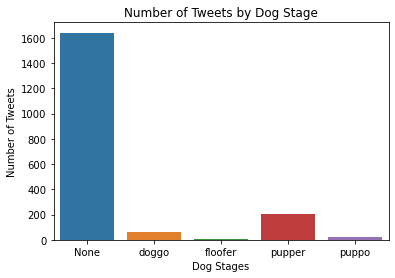

In [258]:
%matplotlib inline

sns.countplot(x='dog_stage',data=df_dogs)
plt.xlabel('Dog Stages')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Dog Stage')
plt.show()

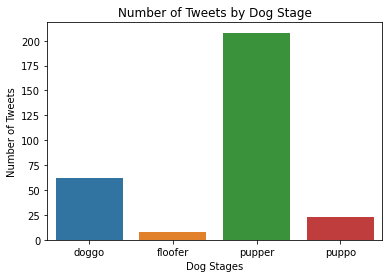

In [259]:
sns.countplot(x='dog_stage',data=df_dogs,order=["doggo", "floofer","pupper","puppo"])
plt.xlabel('Dog Stages')
plt.ylabel('Number of Tweets')
plt.title('Number of Tweets by Dog Stage')
plt.show()

From here we can see that a large proportion of dogs within tweets weren't classified as either `doggo`, `floofer`, `pupper` or `puppo`. Based on the data that is classified, `pupper` is the most tweeted `dog_stage`.

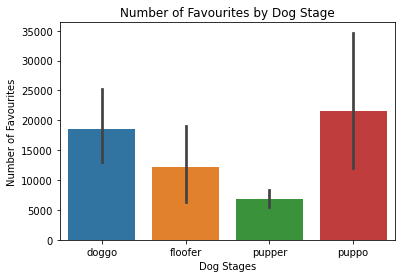

In [262]:
#favourites by dog stage
sns.barplot(x='dog_stage',y='favorite_count',data=df_dogs,order=["doggo", "floofer","pupper","puppo"])
plt.xlabel('Dog Stages')
plt.ylabel('Number of Favourites')
plt.title('Number of Favourites by Dog Stage')
plt.show()


From the above graph, we can see that `puppo` has more favourites then any other `dog_stage`. This is closely followed by `doggo`. So even though `pupper` was tweeted about more, it wasn't necessarily favourited more (this may not be entirely true as large amount of dogs were not classified).

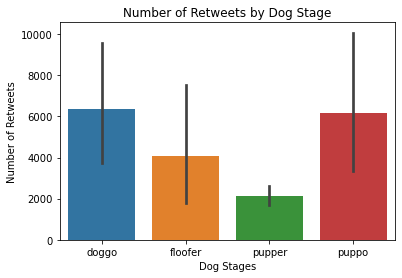

In [264]:
#retweets by dog stage
sns.barplot(x='dog_stage',y='retweet_count',data=df_dogs,order=["doggo", "floofer","pupper","puppo"])
plt.xlabel('Dog Stages')
plt.ylabel('Number of Retweets')
plt.title('Number of Retweets by Dog Stage')
plt.show()

In [265]:
df_dogs.groupby('dog_stage')['retweet_count'].sum()

dog_stage
None       3650948
doggo       394555
floofer      32642
pupper      442954
puppo       141766
Name: retweet_count, dtype: int64

Again, `puppo` was the more popular dog stage in terms of retweets followed by `doggo`. However, as mentioned previously a lot of dogs that were tweeted were not classified.

#### Is there a link between favourites and retweets?

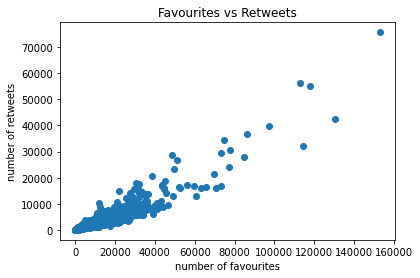

In [266]:
plt.scatter(x=df_dogs.favorite_count,y=df_dogs.retweet_count)
plt.xlabel('number of favourites')
plt.ylabel('number of retweets')
plt.title('Favourites vs Retweets')
plt.show()

Looking at the above scatter graph, we can see that there is a positive correlation between favourites and retweets.

In [268]:
df_dogs[['favorite_count','retweet_count']].corr()

,favorite_count,retweet_count
favorite_count,1.000000,0.928448
retweet_count,0.928448,1.000000


By default .corr() chooses to use pearson as the method of correlation. A value of 0.928 shows that there is a very strong positive correlation between `favorite_count` and `retweet_count`.

<AxesSubplot:xlabel='favorite_count', ylabel='retweet_count'>

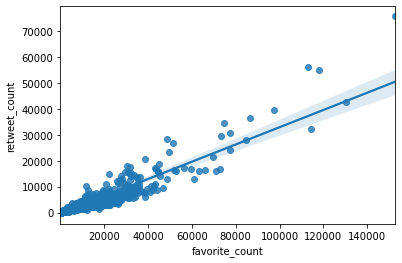

In [289]:
sns.regplot(x='favorite_count',y='retweet_count',data=df_dogs)

#### What are the most favourited breeds?

In [279]:
# using p1 information to look at most favourited predicted breed

favourite_ten=df_dogs.groupby('p1')['favorite_count'].sum().sort_values(ascending=False).head(10)
favourite_ten

p1
golden_retriever      1505232
Labrador_retriever     954875
Pembroke               910870
Chihuahua              627535
Samoyed                470034
French_bulldog         428597
chow                   371624
pug                    285646
cocker_spaniel         282184
Pomeranian             260074
Name: favorite_count, dtype: int64

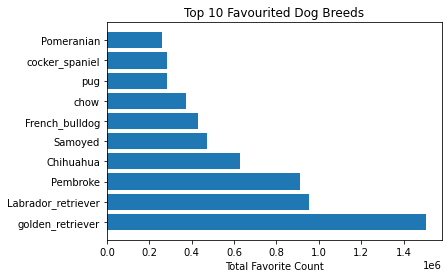

In [280]:
plt.barh(favourite_ten.index, favourite_ten)
plt.xlabel('Total Favorite Count')
plt.title('Top 10 Favourited Dog Breeds')
plt.show()

Here we can see that the most favourited breed was the Golden Retriever which is followed by the Labrador.

Text(0.5, 0, 'Rating')

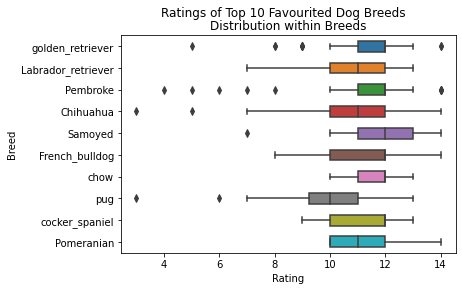

In [282]:
sns.boxplot(y = 'p1', x = 'rating_numerator',
                    data = df_dogs,
                    orient = 'h',
                    width = 0.5,
                    order = favourite_ten.index.tolist())

plt.suptitle('Ratings of Top 10 Favourited Dog Breeds')
plt.title('Distribution within Breeds')
plt.ylabel('Breed')
plt.xlabel('Rating')

All of the top 10 breeds fall within a rating range of 7 and 14 with several outliers. In particular, Golden Retriever, Pembroke and Chow all have quite small interquartile ranges (Chow is the only one out of these three to have no outliers) where has the Chihuaha has a much larger range.

In [286]:
df_dogs.rating_numerator.describe()

count    1942.000000
mean       10.531926
std         2.175163
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

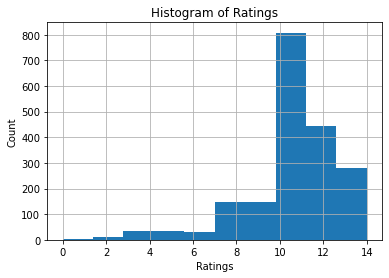

In [290]:
df_dogs.rating_numerator.hist()
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.title('Histogram of Ratings')
plt.show()

The distribution overall of ratings is left skewed which means that are mean is less than the median. Comparing this histogram to the boxplots above, you can say that the top 10 favourited breeds follow a similar shape to the overall data.

#### Which Source is used more?

<AxesSubplot:ylabel='source'>

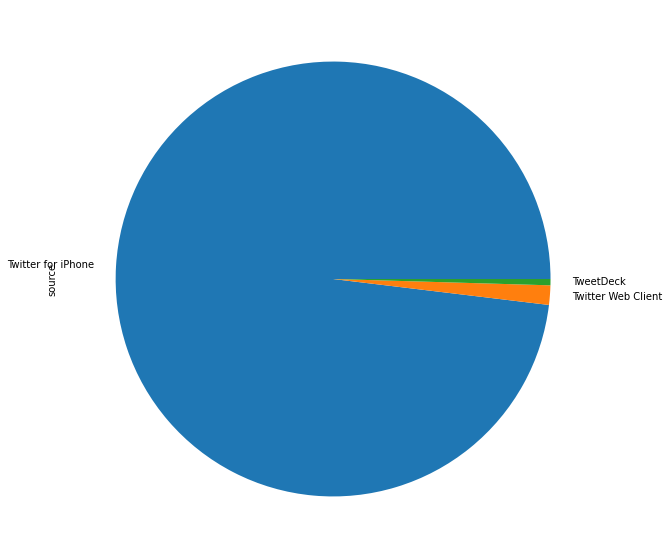

In [285]:
df_dogs.source.value_counts().plot.pie(figsize=(10, 10))

From the above, we can see that nearly all of the tweets made were from Twitter for iPhone.